In [1]:
from matplotlib import pyplot as plt
from scipy.stats import chi2
import numpy as np

In [2]:
test_df = [3,4,5,10,50,500,1000,5000]

/tmp/ipykernel_37429/1696820589.py:9: RuntimeWarning: invalid value encountered in subtract
  return (fun(M2+d) - fun(M2)) / d


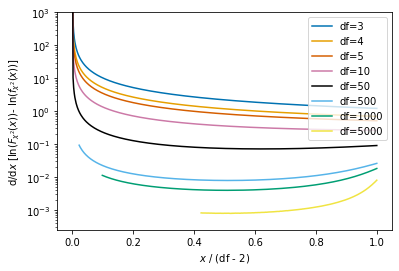

In [7]:
d = 1e-6
x = np.linspace(1e-9,1,500)
for df in test_df:
    ch = chi2(df=df)
    def fun(M2):
        return ch.logcdf(M2) - ch.logpdf(M2)
        #return ch.cdf(M2) / ch.pdf(M2)
    def dfun(M2):
        return (fun(M2+d) - fun(M2)) / d
    #print(ch.logcdf(1), ch.logpdf(1), fun(1), dfun(1))
    #print(ch.cdf(1), ch.pdf(1), fun(1), dfun(1))
    m = x * (df-2)
    y = dfun(m)
    plt.plot(x, y, label=f"df={df}")
plt.yscale("log")
plt.ylim(top=1e3)
plt.legend(loc="upper right")
plt.ylabel(r"d/d$x$ [ln($F_{\chi^2}(x)$)- ln($f_{\chi^2}(x)$)]")
plt.xlabel(r"$x$ / (df - 2)")
plt.savefig("plots/optimal-positive.pdf")